In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

In [53]:
sns.set(style='whitegrid')
sns.set_context('talk')

In [54]:
u,v = np.array([6,0]), np.array([3,1])
u3,v3 = np.array([6,0,4]), np.array([3,5,6])

In [55]:
def get_xy_axes(*vectors):
    """Get appropriate x and y axes for vectors."""
    if len(vectors) == 0:
        return
    if vectors[0].size == 2:
        return get_2d_xy_axes(*vectors)
    elif vectors[0].size == 3:
        return get_3d_xy_axes(*vectors)
    else:
        print('Only vectors in R2 and R3 are allowed as plotting inputs.')
        

def get_z_axis(axes, *vectors):
    """Get appropriate z axis for R3 vector."""
    x,y,z = zip(*vectors)
    min_z = min(min(z), 0)
    max_z = max(max(z), 0) + 2
    return axes.set_zlim(min_z, max_z)

        
def get_2d_xy_axes(*vectors):
    x,y = zip(*vectors)
    min_x = min(min(x), 0)
    min_y = min(min(y), 0)
    max_x = max(max(x), 0) + 2
    max_y = max(max(y), 0) + 2
    return plt.axis([min_x, max_x,
                     min_y, max_y])

def get_3d_xy_axes(*vectors):
    x,y,z = zip(*vectors)
    min_x = min(min(x), 0)
    min_y = min(min(y), 0)
    max_x = max(max(x), 0) + 2
    max_y = max(max(y), 0) + 2
    return plt.axis([min_x, max_x,
                     max_y, min_y])

In [64]:
plot_types = ['arrow',
              'scatter']

def plot_vector(vector, origin=[0,0], plot_type=plot_types[0],
                axes=None, **kwargs):
    """Plots vectors in R2 and R3.
    
    Returns plt if plotting in R2.
    Returns Axes3D if plotting in R3.
    
    If plotting multiple vectors in R3,
    pass in the returned axes from the
    first plot for subsequent plots.
    """
    
    if vector.size == 2:
        return plot_2d_vector(vector, origin, plot_type,
                              **kwargs)
    elif vector.size == 3:
        return plot_3d_vector(vector, origin, plot_type,
                              axes, **kwargs)
    else:
        print('Only vectors in R2 and R3 are allowed as plotting inputs.')
        
        
def plot_2d_vector(vector, origin, plot_type, **kwargs):
    if plot_type == plot_types[0]:
        plt.arrow(origin[0], origin[1],
                  vector[0], vector[1],
                  length_includes_head=True,
                  width=0.1, **kwargs)
    elif plot_type == plot_types[1]:
        x,y = zip(vector)
        plt.scatter(x, y, **kwargs)
    else:
        print('Desired plot not supported.')
        
    return plt

def plot_3d_vector(vector, origin, plot_type, axes, **kwargs):
    if axes == None:
        fig = plt.figure(figsize=(10,7))
        ax3 = fig.add_subplot(111, projection='3d')
    else:
        ax3 = axes
        
    x,y,z = vector
    ax3.invert_xaxis()
    ax3.plot([x,x], [y,y], [0,z], linestyle=':')
    ax3.plot([x,x], [0,y], [z,z], linestyle=':')
    ax3.plot([0,x], [y,y], [z,z], linestyle=':')
    
    if plot_type == plot_types[0]:
        ax3.quiver(0,0,0,x,y,z,
                   linewidth=2,
                   **kwargs)
    elif plot_type == plot_types[1]:
        ax3.scatter(x, y, z, **kwargs)
    else:
        print('Desired plot not supported.')
        
    return ax3

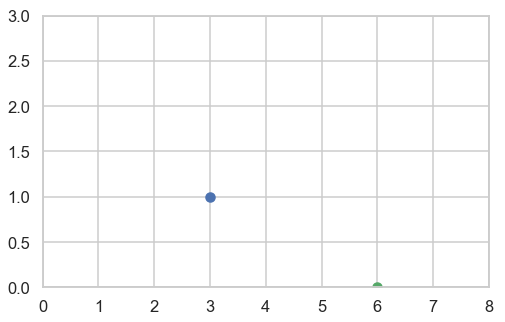

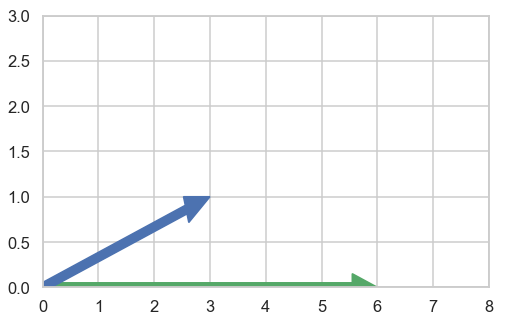

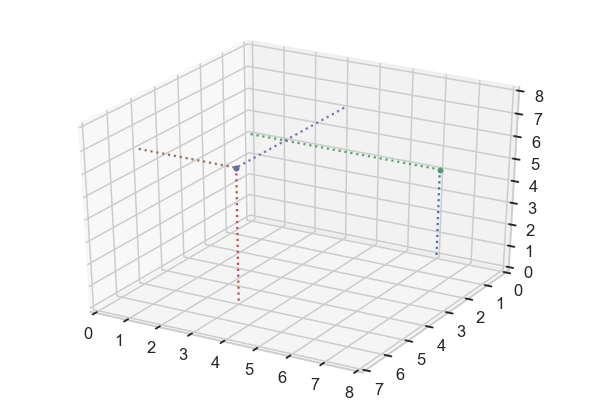

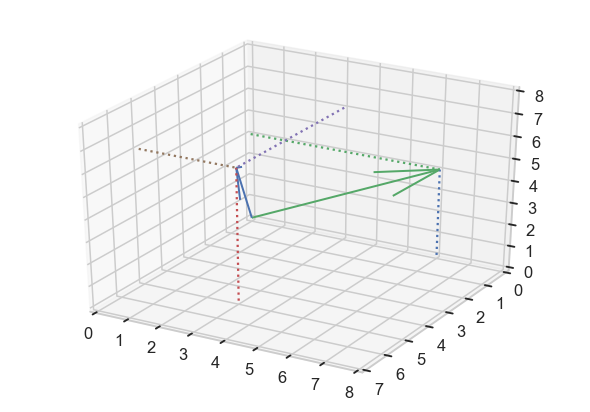

In [68]:
figure = plt.figure(figsize=(8,5))
plot_vector(u, plot_type='scatter', color='g')
plot_vector(v, plot_type='scatter', color='b')
get_xy_axes(u,v)

figure = plt.figure(figsize=(8,5))
plot_vector(u, color='g')
plot_vector(v, color='b')
get_xy_axes(u,v)

ax3 = plot_vector(u3, plot_type='scatter', color='g')
plot_vector(v3, plot_type='scatter', axes=ax3, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)

ax3 = plot_vector(u3, color='g')
plot_vector(v3, axes=ax3, color='b')
get_z_axis(ax3, u3, v3)
get_xy_axes(u3,v3)

plt.show()